# Homework 7. K-means and Recommendation system

***Double Click here to edit this cell***

- Name: 조성현 
- Student ID: 201803430 
- Submission date: 06.18

## Problem 1 (10 pts): K-means

- We want to cluster data in sample_data_1.csv
- Estimate the best k for sample_data_1.csv
- You must show the process to find the best k
- use `sklearn.cluster.KMeans`
- Your KMeans randomstate must be: `random_state=0`

In [ ]:
# YOUR CODE HERE. You may use as many code cells as you want.

In [25]:
import pandas as pd
import numpy as np 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math

     5.1  3.5  1.4  0.2
0    4.9  3.0  1.4  0.2
1    4.7  3.2  1.3  0.2
2    4.6  3.1  1.5  0.2
3    5.0  3.6  1.4  0.2
4    5.4  3.9  1.7  0.4
..   ...  ...  ...  ...
144  6.7  3.0  5.2  2.3
145  6.3  2.5  5.0  1.9
146  6.5  3.0  5.2  2.0
147  6.2  3.4  5.4  2.3
148  5.9  3.0  5.1  1.8

[149 rows x 4 columns]


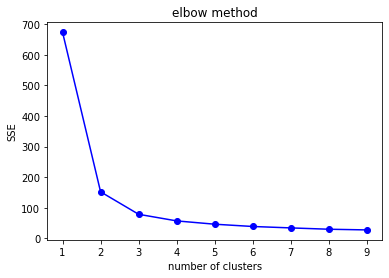

In [31]:
# data load. 
data1 = pd.read_csv("sample_data_1.csv")
# show data taple 
print(data1)
# we checked our data is 4 deminsion  , lets check sse ,Elbow method
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i,random_state =0)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
    
elbow(data1, 10)

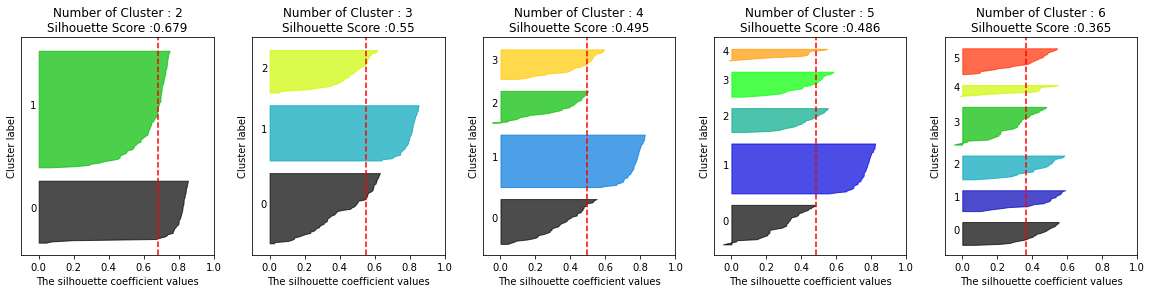

In [32]:
# 상단 그래프에서 k =2 또는 3 이 최적의 클러스터 수로 보인다. 


def visualize_silhouette(cluster_lists, X_features): 

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5, 6],data1)

### Your conclusion:
```
To edit, double-click here
elbow method -
k 가 증가 할 수록 sse 가 감소 하지만 overfitting 의 위험이 있다. 
Occam's razor 의 따라 sse 가  작아지는 시점으로 보인다.
k= 2 또는 3 일때 최적의 k 라고 예측을 하자.

2 또는 3 중에서 silhouette method 을 이용하여 비교한다.

by silhouette method 
클러스터 개수가 최적화되어 있다면 분리도의 값은 커지고 , 응집도의 값은 작아 지기때문에 
실루엣 계수는 1에 가까워 진다.
즉 계수가 1에 가까우면 갯수가 최적화 되어 있다고 판단이 가능하다.

클러스터의 갯수가 2개 일때 실루엣 계수가  k=3 보다 높은 것을 볼 수 있다.

결론 KMeans 에서 k=2 를 사용한다.
```

## Problem 2 (40 pts): K-means implementation

- Make your own implementaion of K-means algorithm
- If the sum of distances between previous centroids and current centroids is less than or equal to `EPSILON`, K-means stops.
- If K-means algorithm reaches the maximum number of iterations `max_iter`, it stops.
- In `fit` method, you must run k-means in `n_init` times with different centroid seeds. Then choose the best.
- `fit` method computes centroids and labels and stores them in `self.cluster_centers_` and `self.labels_`
- `predict` method returns the centroids closest to each point in `X`
- `score` method returns **the negative of** the sum of squared distances between each point in `X` and the centroid closest to the point.

In [58]:
# # n_init : nmber of loop to find optimize  , stop condition mat_iter,EPSILOM
# # score. : sum of squared distance : it have negative meannig so we give negative to make positive

# #data 받아와서 , 1.거리를 구한후 2.centroid 를 구함
# # centriod 를 기준


# import numpy as np
# from numpy.linalg import norm
# class MyKMeans:
#     """performs k-means clustering using numpy"""

#     def __init__(self, n_clusters=8, n_init=10, EPSILON=1e-4, max_iter=300, random_state=0):
#         self.n_clusters = n_clusters        # number of clusters
#         self.n_init = n_init                # number of time the k-means algorithm will be run with different centroid seeds.
#         self.EPSILON = EPSILON              # EPSILON; stop if the sum of centroid movements <= EPSILON
#         self.max_iter = max_iter            # maximum number of iterations
#         self.random_state = random_state    # random number seed
#         self.cluster_centers_ = None        # means of clusters
#         self.labels_ = None                 # X's assignments to clusters
    
#     def initializ_centroids(self, X):
#         np.random.RandomState(self.random_state)
#         random_idx = np.random.permutation(X.shape[0])
#         centroids = X[random_idx[:self.n_clusters]]
#         return centroids

#     def compute_centroids(self, X, labels):
#         centroids = np.zeros((self.n_clusters, X.shape[1]))
#         for k in range(self.n_clusters):
#             centroids[k, :] = np.mean(X[labels == k, :], axis=0)
#         return centroids

#     def compute_distance(self, X, centroids):
#         distance = np.zeros((X.shape[0], self.n_clusters))
#         for k in range(self.n_clusters):
#             row_norm = norm(X - centroids[k, :], axis=1)
#             distance[:, k] = np.square(row_norm)
#         return distance

#     def find_closest_cluster(self, distance):
#         return np.argmin(distance, axis=1)

#     def compute_sse(self, X, labels, centroids):
#         distance = np.zeros(X.shape[0])
#         for k in range(self.n_clusters):
#             distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
#         return np.sum(np.square(distance))
    
        
#     def fit(self, X):
#         X = X.astype(float)
#         self.cluster_centers_ = self.initializ_centroids(X)
#         for i in range(self.max_iter):
#             old_centroids = self.cluster_centers_
#             distance = self.compute_distance(X, old_centroids)
#             self.labels_ = self.find_closest_cluster(distance)
#             self.cluster_centers_ = self.compute_centroids(X, self.labels_)
#             if np.all(old_centroids == self.cluster_centers_):
#                 break
#         self.error = self.compute_sse(X, self.labels_, self.cluster_centers_)
        
        
#         return self
        
        
#     def predict(self, X):
#         X = X.astype(float)
#         distance = self.compute_distance(X, self.centroids)
#         return self.find_closest_cluster(distance)
    
#     def score(self, X):
#         X = X.astype(float)

        


In [63]:
# n_init : nmber of loop to find optimize  , stop condition mat_iter,EPSILOM
# score. : sum of squared distance : it have negative meannig so we give negative to make positive

#data 받아와서 , 1.거리를 구한후 2.centroid 를 구함
# centriod 를 기준


import numpy as np
from numpy.linalg import norm
class MyKMeans:
    """performs k-means clustering using numpy"""

    def __init__(self, n_clusters=8, n_init=10, EPSILON=1e-4, max_iter=300, random_state=0):
        self.n_clusters = n_clusters        # number of clusters
        self.n_init = n_init                # number of time the k-means algorithm will be run with different centroid seeds.
        self.EPSILON = EPSILON              # EPSILON; stop if the sum of centroid movements <= EPSILON
        self.max_iter = max_iter            # maximum number of iterations
        self.random_state = random_state    # random number seed
        self.cluster_centers_ = None        # means of clusters
        self.labels_ = None                 # X's assignments to clusters
    
    def initializ_centroids(self, X):
        np.random.RandomState(self.random_state)
        random_idx = np.random.permutation(X.shape[0])
        centroids = X[random_idx[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def find_closest_cluster(self, distance):
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
        
    def fit(self, X):
        X = X.astype(float)
        self.cluster_centers_ = self.initializ_centroids(X)
        for i in range(self.max_iter):
            old_centroids = self.cluster_centers_
            distance = self.compute_distance(X, old_centroids)
            self.labels_ = self.find_closest_cluster(distance)
            self.cluster_centers_ = self.compute_centroids(X, self.labels_)
            if np.all(old_centroids == self.cluster_centers_):
                break
        self.error = self.compute_sse(X, self.labels_, self.cluster_centers_)
#         
        
        return self
        
        
    def predict(self, X):
        X = X.astype(float)
        distance = self.compute_distance(X, self.centroids)
        return self.find_closest_cluster(distance)
    
    def score(self, X):
        X = X.astype(float)
        return -self.error
        


In [44]:
# n_init : nmber of loop to find optimize  , stop condition mat_iter,EPSILOM
# score. : sum of squared distance : it have negative meannig so we give negative to make positive

#data 받아와서 , 1.거리를 구한후 2.centroid 를 구함
# centriod 를 기준

import numpy as np

class MyKMeans:
    """performs k-means clustering using numpy"""

    def __init__(self, n_clusters=8, n_init=10, EPSILON=1e-4, max_iter=300, random_state=0):
        self.n_clusters = n_clusters        # number of clusters
        self.n_init = n_init                # number of time the k-means algorithm will be run with different centroid seeds.
        self.EPSILON = EPSILON              # EPSILON; stop if the sum of centroid movements <= EPSILON
        self.max_iter = max_iter            # maximum number of iterations
        self.random_state = random_state    # random number seed
        self.cluster_centers_ = None        # means of clusters
        self.labels_ = None                 # X's assignments to clusters

        
    def fit(self, X):
        X = X.astype(float)
        # FILL OUT
        
        return self
        
        
    def predict(self, X):
        X = X.astype(float)
        # FILL OUT
    
    
    def score(self, X):
        X = X.astype(float)
        # FILL OUT
        


### Run the following code:

In [64]:
# DO NOT EDIT
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kmeans = MyKMeans(n_clusters=2).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.score(X))

[[ 1.  2.]
 [10.  2.]]
[0 0 0 1 1 1]
-16.0


In [62]:
# test!
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kmeans = MyKMeans(n_clusters=2).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.error)

[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
16.0


### Your output must be the following:

```
[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0
```
or
```
[[ 1.  2.]
 [10.  2.]]
[0 0 0 1 1 1]
-16.0
```

### Run the following code:

In [65]:
# DO NOT EDIT
%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

with open('sample_data_2.csv', 'r') as rf:  # some windows systems: with open('sample_data_2.csv', 'rb') as rf:
    X2 = np.loadtxt(rf, delimiter = ",")

ks3 = range(1, 21)
%time errors3 = [-MyKMeans(n_clusters=k, n_init=10).fit(X2).score(X2) for k in ks3]

CPU times: user 282 ms, sys: 1.82 ms, total: 284 ms
Wall time: 283 ms


### Your code will be graded based on the correctness and the performance
### My implementation result:
Linux
```
CPU times: user 4.18 s, sys: 3.92 ms, total: 4.18 s
```
Windows
```
Wall time: 4.04 s
```

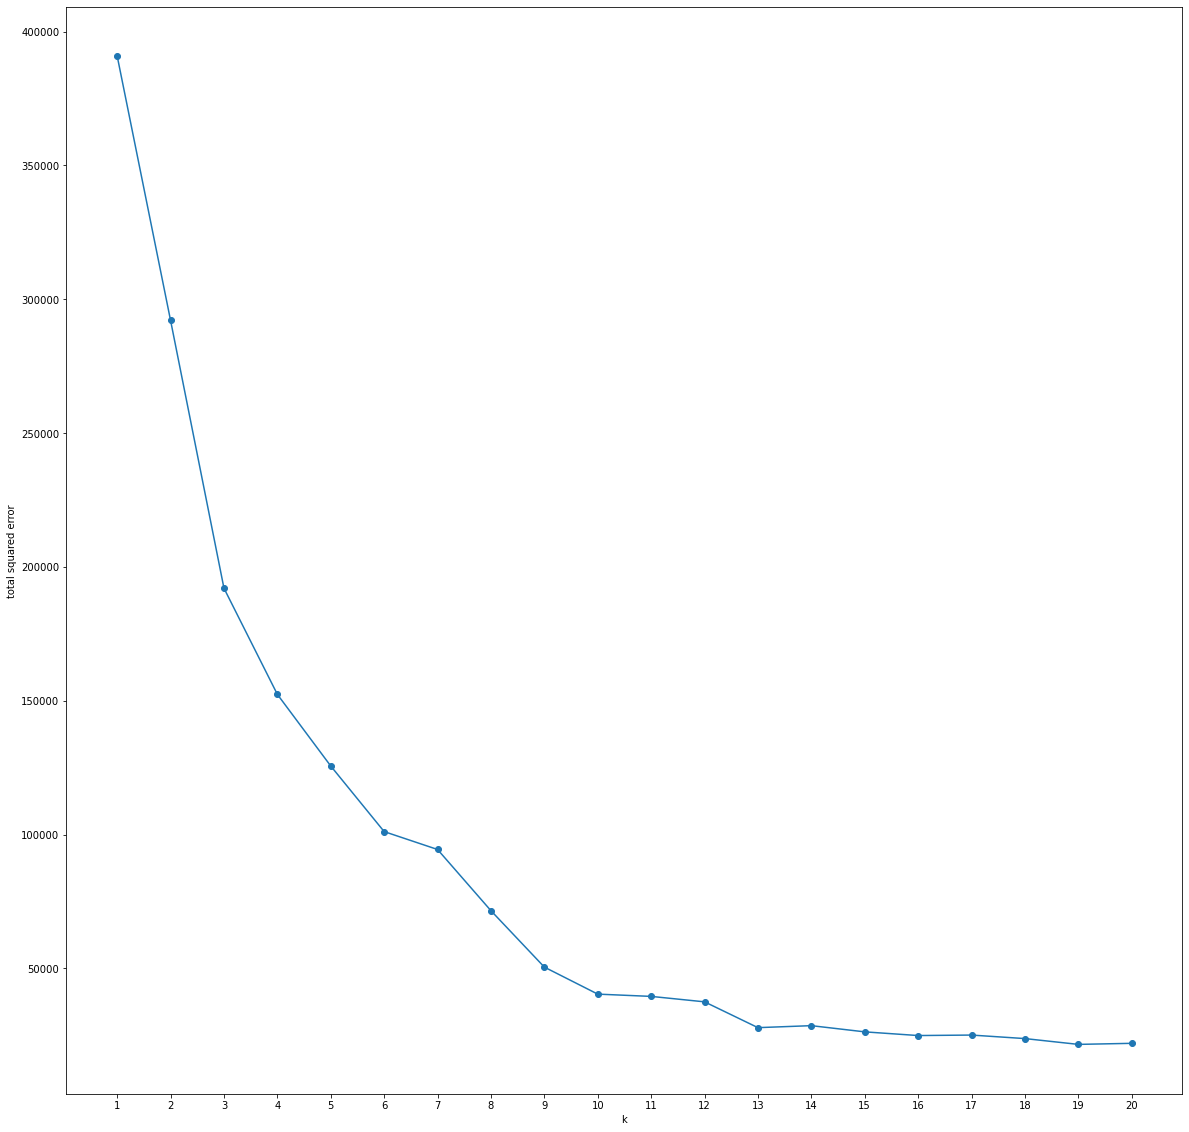

In [66]:
# DO NOT EDIT
plt.figure(figsize=(20,20))
plt.plot(ks3, errors3, '-o')
plt.xticks(ks3)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

### Your output must be similar to the following:
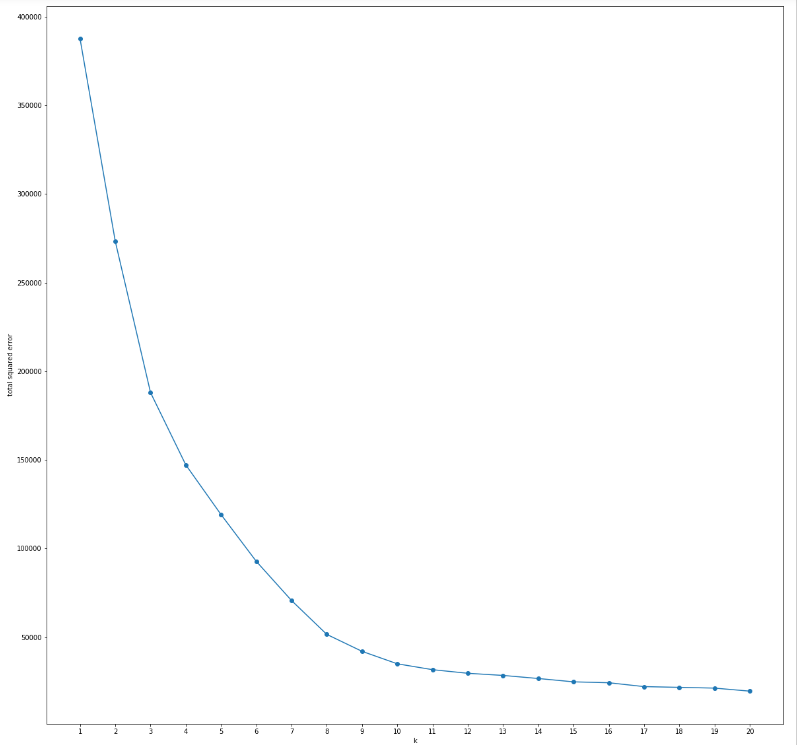

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_7_홍길동_202200001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills